In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [223]:
df = pd.read_csv(r'/content/tested.csv')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [226]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [227]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Data Pre-Processing**

In [228]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [229]:
df.drop('Cabin',axis='columns',inplace=True)

In [230]:
sex=pd.get_dummies(df['Sex'],drop_first=True)


In [231]:
embarked = pd.get_dummies(df['Embarked'])
embarked

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [232]:
df = pd.concat([df,sex,embarked],axis='columns')
df.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis='columns',inplace=True)

In [233]:
df= df.dropna()

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   male      417 non-null    uint8  
 7   C         417 non-null    uint8  
 8   Q         417 non-null    uint8  
 9   S         417 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 24.4 KB


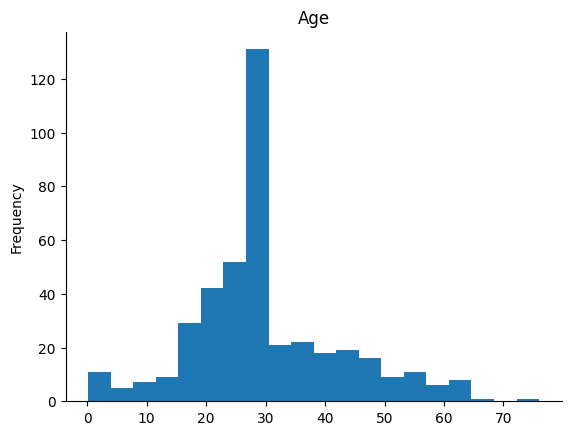

In [235]:
from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

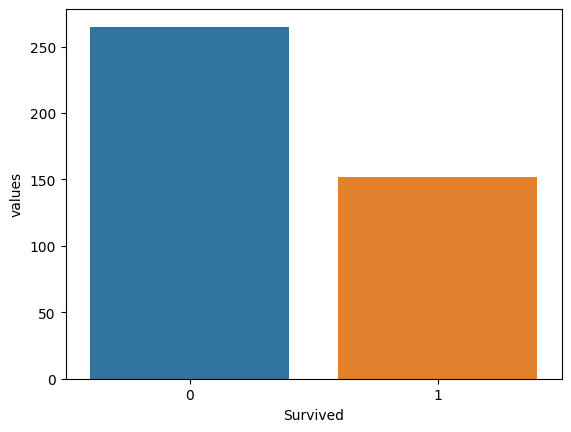

In [236]:
temp = df['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived' : temp.index, 'values' : temp.values})
sns.barplot(x = 'Survived', y = 'values', data = temp_df)
plt.show()

**Building Models**

In [237]:
X=df.drop('Survived',axis='columns')
y=df['Survived']

In [238]:
# Split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

Model Score:  0.5714285714285714
Predicted Values:  [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


<Axes: >

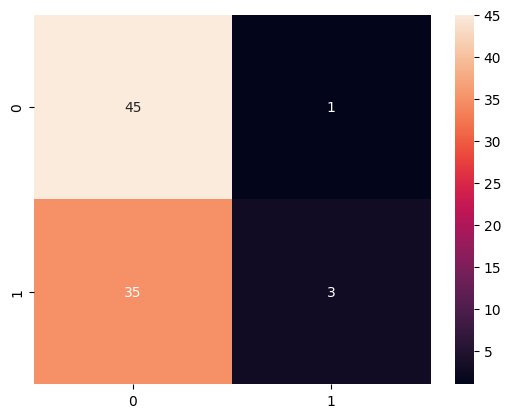

In [239]:
# SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_svc)

print('Model Score: ', model_svc.score(X_test,y_test))
print('Predicted Values: ', y_pred_svc)
sns.heatmap(cm_svc,annot=True)


Model Score:  1.0
Predicted Values:  [1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0]


<Axes: >

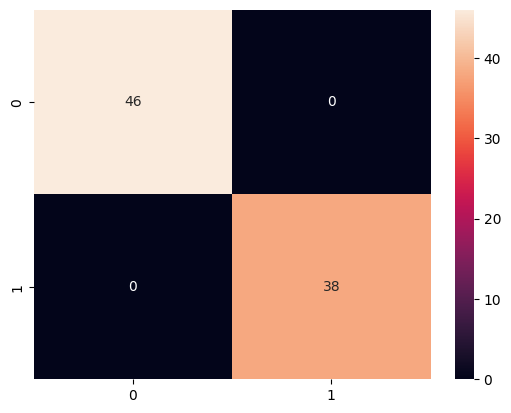

In [240]:
# Logistic Regression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred_lr)


print('Model Score: ', model_lr.score(X_test,y_test))
print('Predicted Values: ', y_pred_lr)
sns.heatmap(cm_lr,annot=True)

Model Score:  1.0
Predicted Values:  [1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0]


<Axes: >

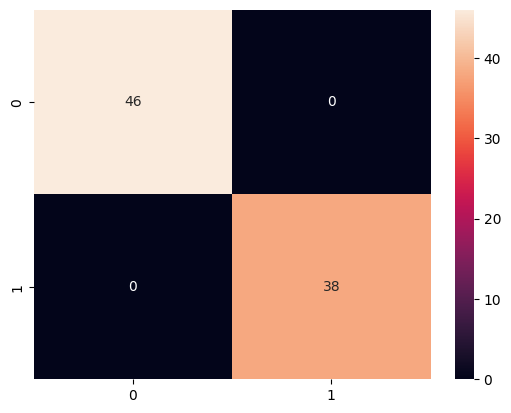

In [241]:
# Random Forest Classifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred_rfc = model_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)


print('Model Score: ', model_rfc.score(X_test,y_test))
print('Predicted Values: ', y_pred_rfc)
sns.heatmap(cm_rfc,annot=True)
